In [60]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#hiding warning messages
import warnings
warnings.filterwarnings("ignore")

#Reading in Summary ANTAGONIST CSV
data_antag = pd.read_csv('CleanedAntagonistData2.csv')
#data.dtypes

#Reading in Summary AGONIST csv
data_ag = pd.read_csv('CleanedAgonistData3.csv')

#Reading in Combined CSV
data_both = pd.read_csv('CombinedDataCleaned.csv')

In [120]:
#potency values for agonists and antagonists
ag_pot = data_both['Ratio Potency (uM)'].where(data_both['Activity Score'] == 'active agonist')
ag_pot = ag_pot.dropna()
antag_pot = data_both['Ratio Potency (uM)'].where(data_both['Activity Score'] == 'active antagonist')
antag_pot = antag_pot.dropna()
pot = ag_pot.append(antag_pot)


#efficacy values for agonists and antagonists
ag_eff = data_both['Ratio Efficacy (%)'].where(data_both['Activity Score'] == 'active agonist')
ag_eff = ag_eff.dropna()
antag_eff = data_both['Ratio Efficacy (%)'].where(data_both['Activity Score'] == 'active antagonist')
antag_eff = antag_eff.dropna()
eff = ag_eff.append(antag_eff)

#combining lists into a total df
pot_eff = pd.concat([pot, eff], axis = 1)
pot_eff = pot_eff.dropna()

#agonist dataframe
ag = pd.concat([ag_pot, ag_eff], axis = 1)
ag = ag.dropna()

#antagonist dataframe
antag = pd.concat([antag_pot, antag_eff], axis = 1)
antag = antag.dropna()

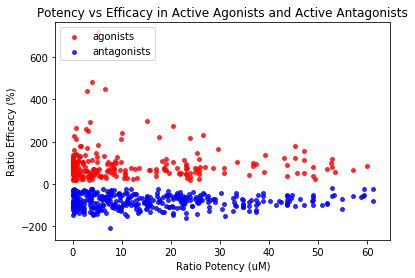

In [133]:
#scatterplot of potency vs efficacy values
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(ag['Ratio Potency (uM)'], ag['Ratio Efficacy (%)'], c = 'red', alpha = 0.8, s = 15, label = "agonists")
ax.scatter(antag['Ratio Potency (uM)'], antag['Ratio Efficacy (%)'], c = 'blue', alpha = 0.8, s = 15, label = "antagonists")

plt.title('Potency vs Efficacy in Active Agonists and Active Antagonists')
plt.xlabel("Ratio Potency (uM)")
plt.ylabel("Ratio Efficacy (%)")
plt.legend(loc=2)
plt.show()

In [134]:
#Antagonist Dictionary of CID || Activity Summary, Ratio Activity, Ratio Potency, Ratio Efficacy
df_antag = data_antag[['PUBCHEM_CID', 'Activity Summary', 'Ratio Potency (uM)', 'Ratio Efficacy (%)']]
df_antag = df_antag.set_index('PUBCHEM_CID')
dict_antag = df_antag.to_dict('index')

#Agonist Dictionary of CID || Activity Summary, Ratio Activity, Ratio Potency, Ratio Efficacy
df_ag = data_ag[['PUBCHEM_CID', 'Activity Summary', 'Ratio Potency (uM)', 'Ratio Efficacy (%)']]
df_ag = df_ag.set_index('PUBCHEM_CID')
dict_ag = df_ag.to_dict('index')


In [136]:
#Merge
df_full = df_antag.merge(df_ag, how = 'outer', on = 'PUBCHEM_CID')


In [137]:
##Merging the two dictionaries
def Merge(dict_antag, dict_ag):
    res = {**dict_antag, **dict_ag}
    return res

dict_full = Merge(dict_antag, dict_ag)


In [138]:
dict_full[179]

{'Activity Summary': 'inactive',
 'Ratio Potency (uM)': nan,
 'Ratio Efficacy (%)': 0.0}